<a href="https://colab.research.google.com/github/Darshan-213/Smart-emergency-responsive-system/blob/main/Emergency_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Access/Enable GPU for fast processing

In [ ]:
import os

if 'COLAB_GPU' in os.environ:
  print("GPU is Enabled")
else:
  print("GPU is not Enabled")

GPU is Enabled


In [ ]:
%pwd

'/content'

## Install the YOLO-8

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade ultralytics

In [ ]:
import ultralytics
ultralytics.checks()


Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.1/112.6 GB disk)


## **Import** DataSet : From Roboflow

In [ ]:
%pwd

'/content'

In [ ]:
!mkdir AmbulanceData

In [ ]:
path = "/content/AmbulanceData"

In [ ]:
import os
os.chdir(path)
%pwd

'/content/AmbulanceData'

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oi6eOix2hZLib8meN8MI")
project = rf.workspace("mrme").project("ambulance-qasjo")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 133.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ambulance-1 in yolov8:: 100%|██████████| 8704/8704 [00:01<00:00, 7038.72it/s]


## Train the YOLOv8 over the dataset

In [ ]:
%pwd

'/content/AmbulanceData'

In [ ]:
os.chdir("/content/AmbulanceData/ambulance-1")

In [ ]:
%pwd

'/content/AmbulanceData/ambulance-1'

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=10 imgsz=640 batch=16

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

In [ ]:
!ls "/content/AmbulanceData/ambulance-1/runs/detect/train"

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


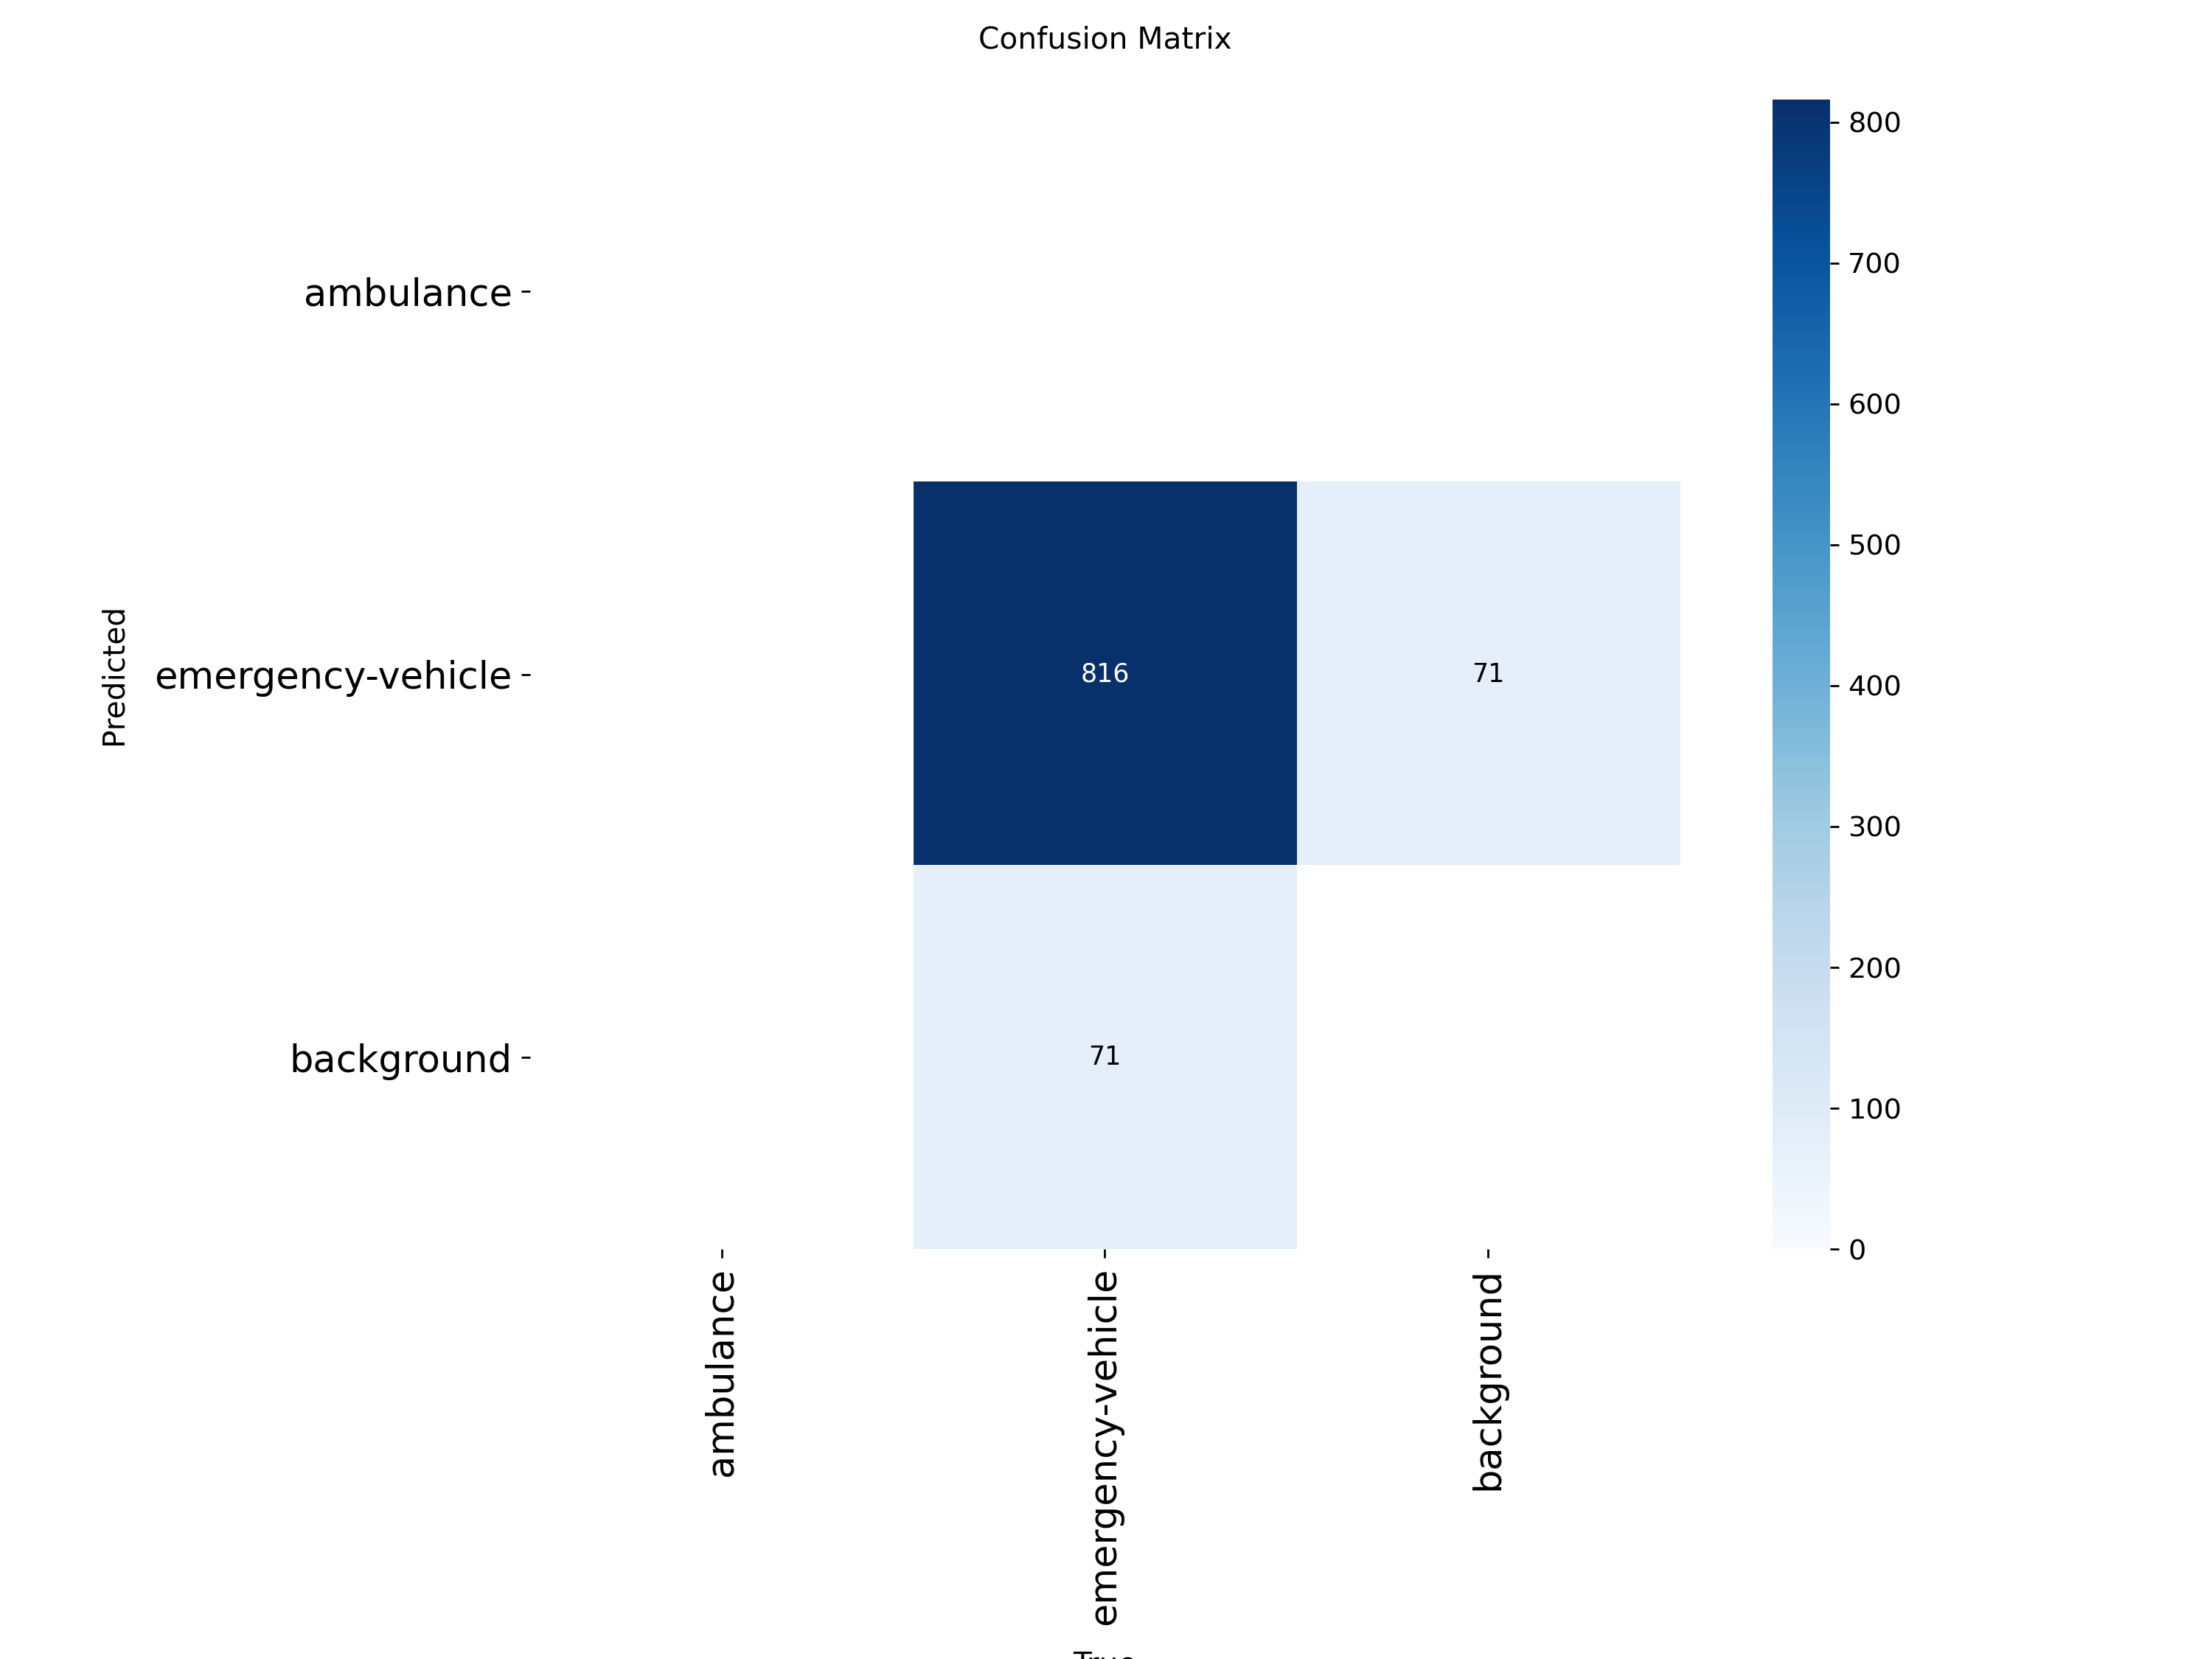

In [ ]:
# Confusion matrix image display
from IPython.display import Image, display
display(Image(filename='/content/AmbulanceData/ambulance-1/runs/detect/train/confusion_matrix.png'))

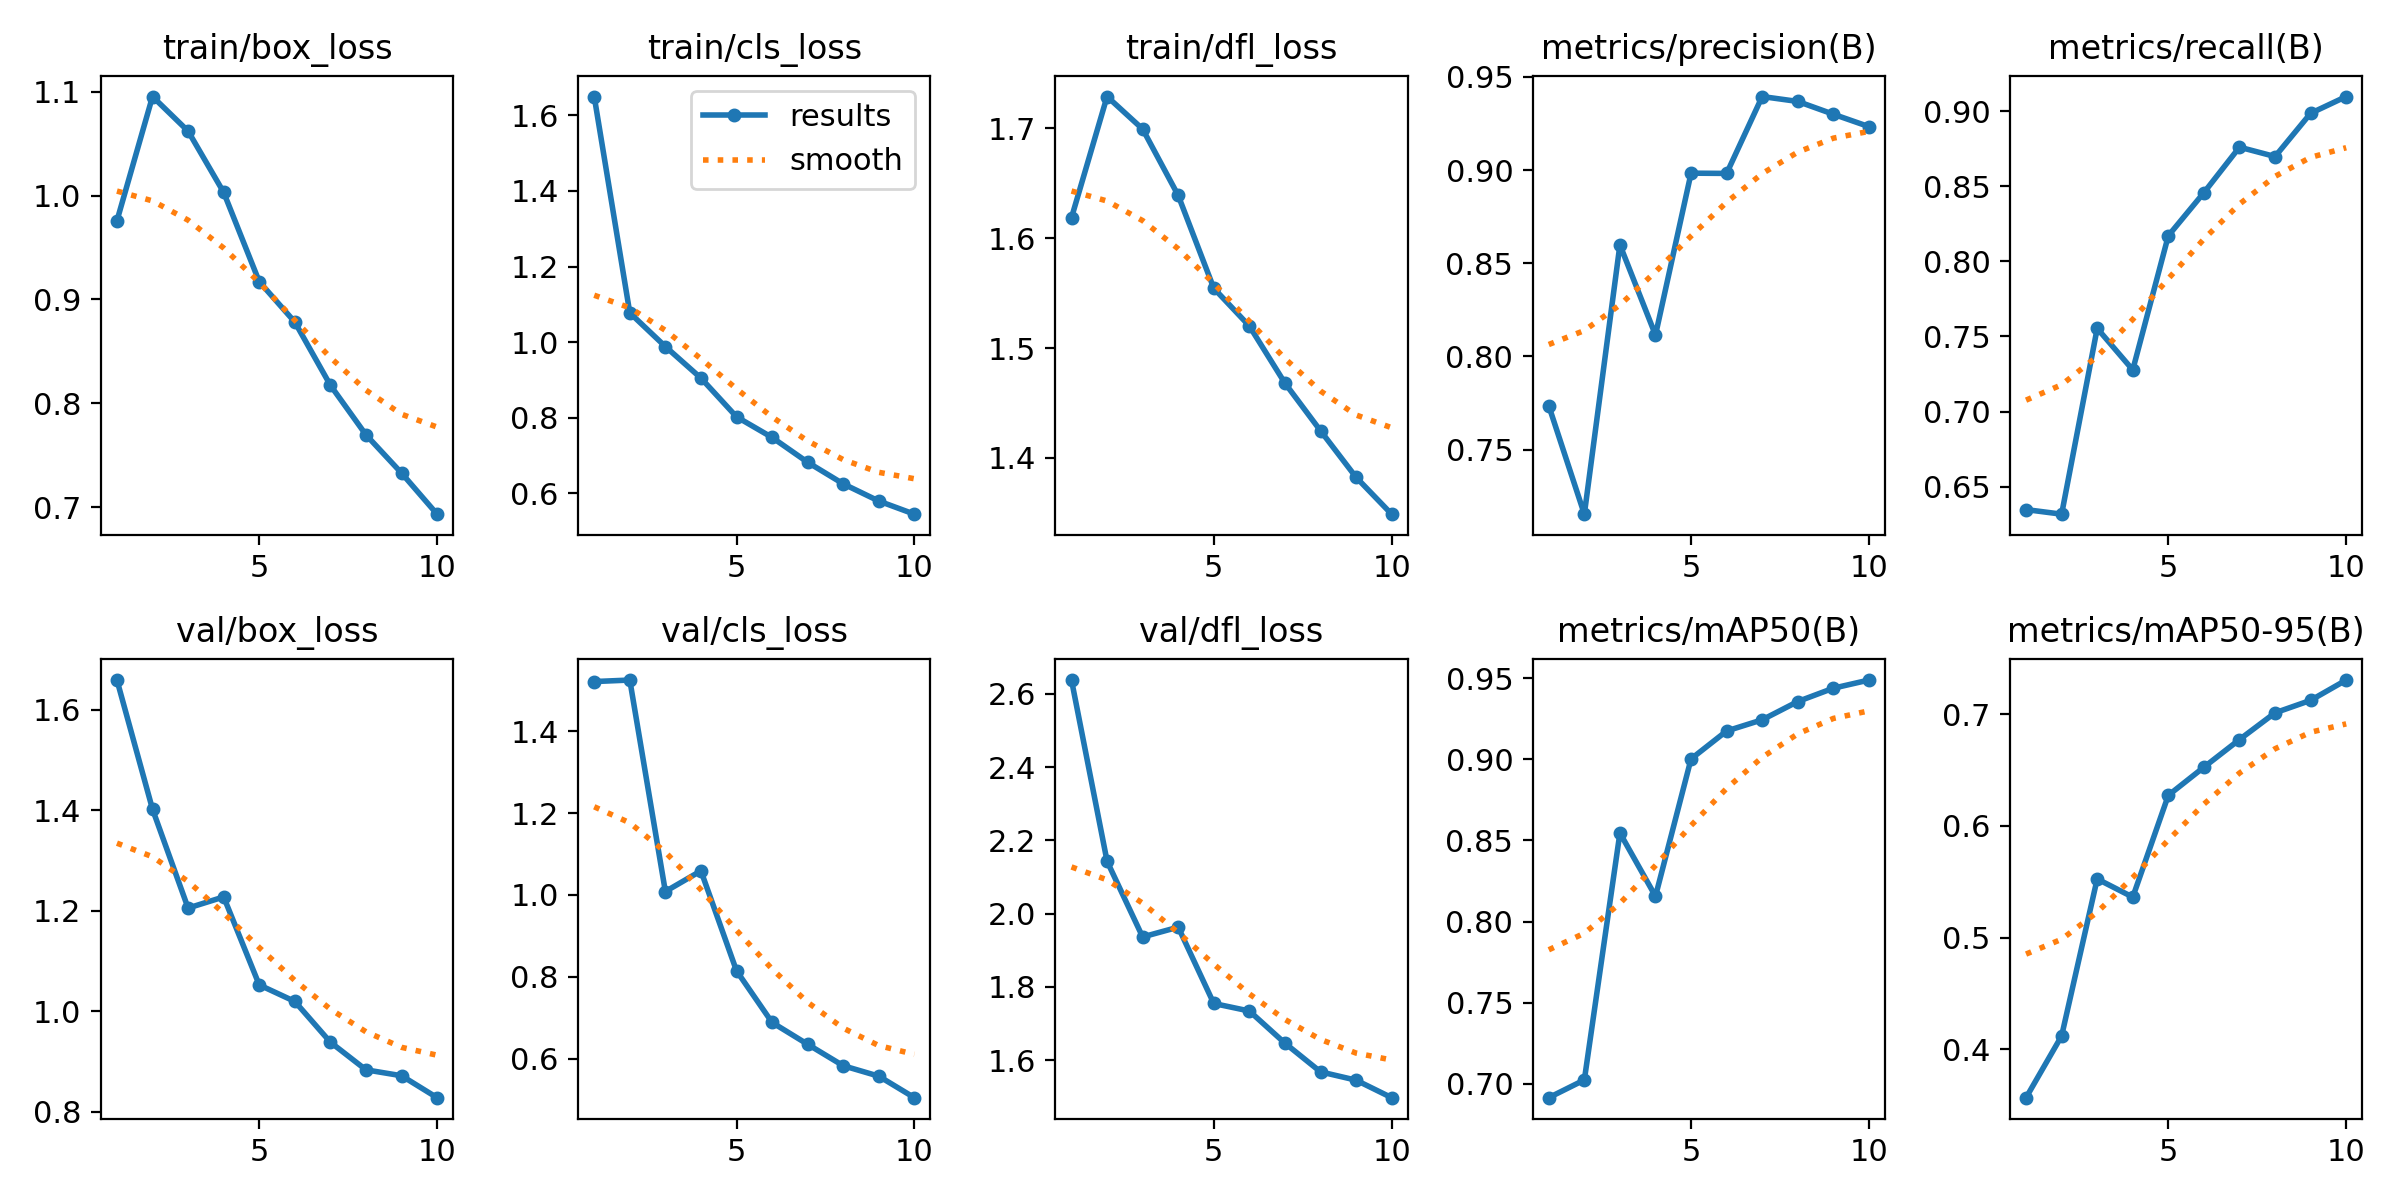

In [ ]:
# result.png matrix image display
from IPython.display import Image, display
display(Image(filename='/content/AmbulanceData/ambulance-1/runs/detect/train/results.png'))

In [ ]:
import pandas as pd
df = pd.read_csv('/content/AmbulanceData/ambulance-1/runs/detect/train/results.csv')
print(df.head())

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   67.9239         0.97585         1.64979         1.61853   
1      2  131.4280         1.09556         1.07752         1.72871   
2      3  194.0930         1.06225         0.98835         1.69914   
3      4  256.0500         1.00325         0.90491         1.63876   
4      5  317.9770         0.91718         0.80250         1.55436   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.77348            0.63472           0.69148   
1               0.71530            0.63167           0.70241   
2               0.85989            0.75536           0.85460   
3               0.81144            0.72772           0.81561   
4               0.89835            0.81704           0.90026   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.35682       1.65960       1.52190       2.63791  0.000553   
1              0.41205       1.40246  

In [ ]:
print(df.tail())

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
5      6  380.131         0.87827         0.74786         1.51999   
6      7  442.730         0.81735         0.68219         1.46806   
7      8  505.536         0.76959         0.62511         1.42475   
8      9  567.520         0.73273         0.57962         1.38244   
9     10  629.795         0.69310         0.54488         1.34887   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
5               0.89822            0.84570           0.91747   
6               0.93948            0.87599           0.92435   
7               0.93685            0.86974           0.93561   
8               0.92999            0.89853           0.94383   
9               0.92333            0.90968           0.94885   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
5              0.65258       1.01977       0.68819       1.73403  0.000842   
6              0.67731       0.93871       0

## Testing the Model with a Video

In [ ]:
%pwd

'/content/AmbulanceData/ambulance-1'

In [ ]:
os.chdir("/content")

In [ ]:
%pwd

'/content'

In [ ]:
#!mkdir ManualTestingData

In [ ]:
#os.chdir("/content/ManualTestingData")
#%pwd

In [ ]:
#URL = "https://drive.google.com/file/d/1Rx34ykyqcxVIt_J-B2u9ViBat5ZWhATE/view?usp=sharing"
#id = "1Rx34ykyqcxVIt_J-B2u9ViBat5ZWhATE"

#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Rx34ykyqcxVIt_J-B2u9ViBat5ZWhATE'

In [ ]:
# Using the best.pt for testing
#!yolo task=detect mode=predict model=/content/AmbulanceData/ambulance-1/runs/detect/train/weights/best.pt conf=0.25 source='/content/v3.mp4' save = True

In [ ]:
# Using the best.pt for testing
#!yolo task=detect mode=predict model=/content/AmbulanceData/ambulance-1/runs/detect/train/weights/best.pt conf=0.25 source='inputV1.mp4' save = True

In [ ]:
# If the download does not works
#from google.colab import files
#files.download('/content/ManualTestingData/runs/detect/predict/inputV1.avi')

In [ ]:
# testing of image a6
#!yolo task=detect mode=predict model=/content/AmbulanceData/ambulance-1/runs/detect/train/weights/best.pt conf=0.25 source='/content/a6.jpeg' save = True

In [ ]:
# a20
#!yolo task=detect mode=predict model=/content/AmbulanceData/ambulance-1/runs/detect/train/weights/best.pt conf=0.25 source='/content/a20.jpeg' save = True

In [ ]:
# a17
!yolo task=detect mode=predict model=/content/AmbulanceData/ambulance-1/runs/detect/train/weights/best.pt conf=0.25 source='/content/a17.jpeg' save = True

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/a17.jpeg: 384x640 1 emergency-vehicle, 46.1ms
Speed: 3.6ms preprocess, 46.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=/content/AmbulanceData/ambulance-1/runs/detect/train/weights/best.pt conf=0.25 source='/content/sanga.jpeg' save = True

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/sanga.jpeg: 448x640 1 emergency-vehicle, 44.8ms
Speed: 4.0ms preprocess, 44.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
